**Question No 1:**

Image Captioning : Image Captioning is the process of generating textual description of an image. It uses both Natural Language Processing and Computer Vision to generate the captions. The dataset will be in the form [image → captions]. The dataset consists of input images and their corresponding output captions.

Encoder

The Convolutional Neural Network(CNN) can be thought of as an encoder. The input image is given to CNN to extract the features. The last hidden state of the CNN is connected to the Decoder.

Decoder

The Decoder is a Recurrent Neural Network(RNN) which does language modelling up to the word level. The first time step receives the encoded output from the encoder and also the <START> vector.


**Import Libraries/Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

**Mount Google drive**

In [ ]:
#Mount Google drive
#Image dataset and pickle file stored in the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Check the GPU available (recommended- use free GPU provided by Google Colab).**

In [ ]:
# code to check if GPU is enabled or not
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('ERROR ::: GPU device not found')
print('SUCCESS ::: Found GPU at: {}'.format(device_name))

SUCCESS ::: Found GPU at: /device:GPU:0


**Load Pickle File**

In [ ]:
#Open the pickle file and stream back the structure

import pickle
with open('/content/drive/MyDrive/task/set_3.pkl', 'rb') as image_captions:image_captions_data = pickle.load(image_captions)
#Type of data serialized
print(type(image_captions_data))
print(len(image_captions_data))
#Print Top 5 elements of the captions
print("\nData From Image Captions")
print("------------------------")
print("\n".join(image_captions_data[:10]))

<class 'list'>
25000

Data From Image Captions
------------------------
3033668641_5905f73990.jpg#0	A man in a white helmet cling to a sheer rock face
2608289957_044849f73e.jpg#0	A baby sit on a tire and hold a toy .
2723477522_d89f5ac62b.jpg#4	two dog play in the grass .
3453019315_cfd5c10dae.jpg#2	A man do a bike trick on a dirt path .
3524975665_7bec41578b.jpg#1	A woman in a yellow jacket and brown hat stand on a path by a lake .
3461041826_0e24cdf597.jpg#2	A black and white dog be splash in a stream .
414568315_5adcfc23c0.jpg#4	A child be use chopstick on overturned kitchen item .
2657484284_daa07a3a1b.jpg#0	A kayak on a river be pass by a wire bridge that join both bank .
2860667542_95abec3380.jpg#2	A white water bird take flight from a lake .
2222498879_9e82a100ab.jpg#3	A tan and black dog walk happy through a field .


**Find missing files from data set location**

In [ ]:
#Some files though have an entry in picke but missing from dataset location
#Dropping those entries from the list

import os

exclude_files = list()
for i in range(len(image_captions_data)):
  image_name = image_captions_data[i].split('#')[0]
  image_name_with_path = os.path.join('/content/drive/MyDrive/task/Image_captioning_Dataset/Flicker8k_Dataset', image_name)

  if not os.path.isfile(image_name_with_path):
    exclude_files.append(image_captions_data[i])
    print(image_name_with_path)

**Dropping missing files from data set location**

In [ ]:
#Print Details of files before and after dropping out
print(exclude_files)
print("Size before deletion: {}".format(len(image_captions_data)))
for i in range(len(exclude_files)):
  image_captions_data.remove(exclude_files[i])
print("Size after deletion: {}".format(len(image_captions_data)))

['2258277193_586949ec62.jpg.1#3\tThree person stand at a station .', '2258277193_586949ec62.jpg.1#0\tperson wait for a subway', '2258277193_586949ec62.jpg.1#4\ttwo woman and one man stand near train track .', '2258277193_586949ec62.jpg.1#1\tSome person look out window in a large building .', '2258277193_586949ec62.jpg.1#2\tThree person be wait on a train platform .']
Size before deletion: 25000
Size after deletion: 24995


**Plot at least two samples and their captions (use matplotlib/seaborn/any other library).**

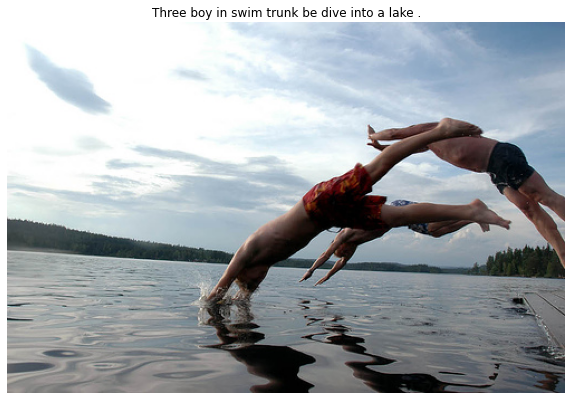

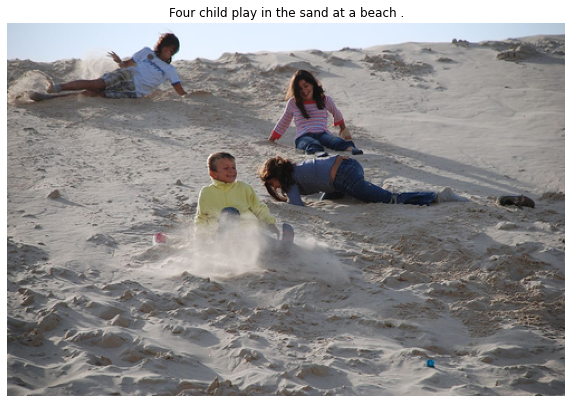

In [ ]:
#Plot at least two samples and their captions (use matplotlib/seaborn/any other library).
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
#Location of Image dataset: /content/drive/MyDrive/task/Image_captioning_Dataset/Flicker8k_Dataset

#Image dataset Path
image_dataset_path = '/content/drive/MyDrive/task/Image_captioning_Dataset/Flicker8k_Dataset'
#Initiate a dictionary to have two random image names
random_image_names = {}

#Loop through to get the image names from the list
while(len(random_image_names) < 2):
  random_index = random.randint(0, len(image_captions_data) - 1)
  image_name = image_captions_data[random_index].split('#')[0]
  random_image_names[image_name] = random_index

#Display the image with caption
for image_name  in random_image_names:
  plt.figure(figsize=(10,10))
  img = mpimg.imread(os.path.join(image_dataset_path, image_name))
  imgplot = plt.imshow(img)
  plt.title(image_captions_data[random_image_names[image_name]].split('\t')[1])
  plt.axis('off')
  plt.show()

**Bring the train and test data in the required format**

Pickle file contains the image id and the text associated with the image.

Eg: '319847657_2c40e14113.jpg#0\tA girl in a purple shirt hold a pillow .

Each image can have multiple captions.

319847657_2c40e14113.jpg -> image name

'#0' -> Caption ID

\t  -> separator between Image name and Image Caption

A girl in a purple shirt hold a pillow . -> Image Caption

Corresponding image wrt image name can be found in the image dataset folder.

In [ ]:
#Bring the train and test data in the required format.
# Eg: '319847657_2c40e14113 .jpg # 0 \t A girl in a purple shirt hold a pillow .
# Each image can have multiple captions.
# 319847657_2c40e14113.jpg -> image name
# #0 -> Caption ID
# \t  -> separator between Image name and Image Caption

import pandas as pd
import os

#Split the data and organize into tabular form
image_caption_data_list = {}

#Loop through image caption information
for i in range(len(image_captions_data)):
  #Split Each line to separate files from rest
  icd_split = image_captions_data[i].split('#')
  #icd_split[0] - image name
  #Split rest of the script to separate id no from description
  icd_cap_split = icd_split[1].split('\t')
  #Generate image id from the filename without extention
  image_id = icd_split[0].split('.') [0]

  #Initiate image_caption_data_list dictionary as empty list
  if image_id not in image_caption_data_list:
    image_caption_data_list[image_id] = list()
  #Append data to list
  image_caption_data_list[image_id].append('' if len(icd_cap_split) < 2 else icd_cap_split[1])

#Print top 5 entries from the data
i = 0
for image in image_caption_data_list:
  print (image, image_caption_data_list[image])
  if i > 5:
    break
  i += 1

df = pd.DataFrame(data=image_caption_data_list.items(), columns=['imagename', 'caption'])
df.head()


3033668641_5905f73990 ['A man in a white helmet cling to a sheer rock face', 'A man with all his equipment rock climb .', 'A rock climber wear a white helmet .']
2608289957_044849f73e ['A baby sit on a tire and hold a toy .', 'Boy in pajama , with red and yellow toy , seat on tire near plant .', 'A little kid , with a red toy , be sit on a tire .', 'Child hold plastic car sit on a tire .']
2723477522_d89f5ac62b ['two dog play in the grass .', 'A large brown dog be chase after a little brown dog .', 'A big dog chase a little dog on the grass .', 'Two brown dog run through the grass together .']
3453019315_cfd5c10dae ['A man do a bike trick on a dirt path .', 'Man perform a trick on a bicycle outside .', 'A helmeted male airborne on a bike on a dirt road .']
3524975665_7bec41578b ['A woman in a yellow jacket and brown hat stand on a path by a lake .', 'A young woman wait under a sculpture in a park .', 'A woman in a yellow coat be stand on a sidewalk .']
3461041826_0e24cdf597 ['A black a

,imagename,caption
0,3033668641_5905f73990,[A man in a white helmet cling to a sheer rock...
1,2608289957_044849f73e,"[A baby sit on a tire and hold a toy ., Boy in..."
2,2723477522_d89f5ac62b,"[two dog play in the grass ., A large brown do..."
3,3453019315_cfd5c10dae,"[A man do a bike trick on a dirt path ., Man p..."
4,3524975665_7bec41578b,[A woman in a yellow jacket and brown hat stan...


**Model Building

1. Use Pretrained Mobilenet model trained on ImageNet dataset (available publicly on google) for image feature extraction.
2. Create 3 layered GRU layer model and other relevant layers for image caption generation.
3. Add L2 regularization to all the GRU layers.
4. Add one layer of dropout at the appropriate position and give reasons.
5. Choose the appropriate activation function for all the layers.
6. Print the model summary.  



In [ ]:
from os import listdir
from pickle import dump
from keras.applications.mobilenet import MobileNet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
import sys


#Extract features from each photo
def extract_features(directory):
  #load the model
  model = MobileNet(weights='imagenet')
  #Restructure the model
  model.layers.pop()
  model = Model(inputs=model.inputs, outputs = model.layers[-1].output)
  #summerize
  #print(model.summary())
  #extract features rom each photo
  features = dict()
  #for name in listdir(directory):
  total_no_files = len(image_caption_data_list)
  count = 1
  for name in image_caption_data_list:
    sys.stdout.write("\rProcessing :" + str(count) + " out of :" + str(total_no_files))
    sys.stdout.flush()
    #Load image from file
    filename = os.path.join(directory, name + '.jpg')
    image = load_img(filename, target_size=(224, 224))
    #convert the image pixels to numpy array
    image = img_to_array(image)
    #Reshape data for the model (N_images, Height, width, num_channels)
    #(224, 224, 3)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    #Prepare image for Mobilenet model
    image = preprocess_input(image)
    #Get features
    feature = model.predict(image, verbose=0)
    #Get image ID
    image_id = name.split('.')[0]
    features[image_id] = feature
    count = count + 1
  return features

from pickle import load
features_file = '/content/drive/MyDrive/task/features.pkl'
#Read from features pkl file
features = load(open(features_file, 'rb'))
print("Total No Features: {}".format(len(features)))


Total No Features: 8016


In [ ]:
# #Call function to extract features from all images.
# #Commented temporarily to avoid repeated run during other activities
# features_file = '/content/drive/MyDrive/task/features.pkl'
# features = extract_features(image_dataset_path)
# print("Total No Features: {}".format(len(features)))
# #Save features to file
# dump(features, open(features_file, 'wb'))

Processing :8016 out of :8016Total No Features: 8016


In [ ]:
#Preprocess the captions and bring them to tokenized form

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

#Preprocess the existing captions
stop_words = set(stopwords.words('english'))

#Loop through each image
for image_id in image_caption_data_list:
  #For each image id, preprocess each item in the list
  for i in range(len(image_caption_data_list[image_id])):
    description = image_caption_data_list[image_id][i]
    #Remove URLS
    description = re.sub(r"http\S+|www\S+|https\S+", '', description, flags=re.MULTILINE)
    #Remove special characters
    description = re.sub(r'\@\w+|\#','', description)
    #Remove the punctuations
    description = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_`{|}~]','',description)
    #Convert tweets into lowercase
    description = description.lower()
    #Remove numbers
    description = re.sub(r'[0-9]+','',description)
    #Remove stopwords
    # description = " ".join([w for w in word_tokenize(description) if not w in stop_words])
    #Lemmatization - usually refers to doing things properly using vocabulary and morphological analysis of words.
    # description = "".join([lemmatizer.lemmatize(w, pos='a') for w in description])
    #Add start and end identifiers
    description = 'beginsentence' + ' ' + description + ' ' + 'endsentence'
    image_caption_data_list[image_id][i] = description

#Print Top 5 entries of dictionary
cnt = 0
for item in image_caption_data_list:
  print(item, image_caption_data_list[item])
  cnt += 1
  if cnt > 5:
    break

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


3033668641_5905f73990 ['beginsentence a man in a white helmet cling to a sheer rock face endsentence', 'beginsentence a man with all his equipment rock climb  endsentence', 'beginsentence a rock climber wear a white helmet  endsentence']
2608289957_044849f73e ['beginsentence a baby sit on a tire and hold a toy  endsentence', 'beginsentence boy in pajama  with red and yellow toy  seat on tire near plant  endsentence', 'beginsentence a little kid  with a red toy  be sit on a tire  endsentence', 'beginsentence child hold plastic car sit on a tire  endsentence']
2723477522_d89f5ac62b ['beginsentence two dog play in the grass  endsentence', 'beginsentence a large brown dog be chase after a little brown dog  endsentence', 'beginsentence a big dog chase a little dog on the grass  endsentence', 'beginsentence two brown dog run through the grass together  endsentence']
3453019315_cfd5c10dae ['beginsentence a man do a bike trick on a dirt path  endsentence', 'beginsentence man perform a trick on

In [ ]:
#Generate vocabulary list
all_vocabulary = set()

#Split all descriptions and dump into vocabulary set
for item in image_caption_data_list:
  all_vocabulary.update(' '.join(image_caption_data_list[item]).split())
  #print(item)
all_vocabulary_count = len(all_vocabulary)
print(len(all_vocabulary))

5467


In [ ]:
#Generate max length of descriptions
max_lengthed_description = 0
total_length = 0
total_string_count = 0
for item in image_caption_data_list:
  for caption in image_caption_data_list[item]:
    total_string_count += 1
    total_length += len(caption.split())
    if max_lengthed_description < len(caption.split()):
      max_lengthed_description = len(caption.split())
      if len(caption.split()) == 21:
        print(caption)

print("Max lengthed description from the list = {}".format(max_lengthed_description))
print("Average length: {}".format(total_length/total_string_count))

beginsentence a girl with a pink headband and blue shirt be drum on blue plastic and metal bowl with chopstick  endsentence
Max lengthed description from the list = 35
Average length: 12.747429485897179


In [ ]:
#Save description to a file
lines = list()
for item in image_caption_data_list:
  for caption in image_caption_data_list[item]:
    lines.append(' '.join([item, caption]))
print('No of lines {}.'.format(len(lines)))
caption_filename = '/content/drive/MyDrive/task/descriptions.txt'
with open(caption_filename, 'w') as capf:
  capf.write('\n'.join(lines))


No of lines 24995.


In [ ]:
#Split the data into train, validation, test with size of 70%, 10% and 20%
import random

image_caption_data_dict_to_list = list()
for item in image_caption_data_list:
  image_caption_data_dict_to_list.append([item, image_caption_data_list[item]])



train_data_size = int(abs(len(image_caption_data_dict_to_list) * 0.7))
validate_data_size = int(abs(len(image_caption_data_dict_to_list) * 0.1))
test_data_size = int(len(image_caption_data_dict_to_list) - train_data_size - validate_data_size)
print("Split count: Train = {}, Validate = {}, Test = {}".format(train_data_size, validate_data_size, test_data_size))

random_index = list(range(len(image_caption_data_dict_to_list)))
random.shuffle(random_index)
print("Random Index size: {}".format(len(random_index)))
print("Top 10 index: {}".format(random_index[:10]))

start_index_train_data_size = 0
end_index_train_data_size = train_data_size - 1
print("Train Data index: [start: {}][end: {}]".format(start_index_train_data_size, end_index_train_data_size))
start_index_validate_data_size = end_index_train_data_size + 1
end_index_validate_data_size = start_index_validate_data_size + validate_data_size - 1
print("Validate Data index: [start: {}][end: {}]".format(start_index_validate_data_size, end_index_validate_data_size))
start_index_test_data_size = end_index_validate_data_size + 1
end_index_test_data_size = start_index_test_data_size + test_data_size - 1
print("Train Data index: [start: {}][end: {}]".format(start_index_test_data_size,end_index_test_data_size))

train_data_list = image_caption_data_dict_to_list[start_index_train_data_size: end_index_train_data_size + 1]
train_validate_list = image_caption_data_dict_to_list[start_index_validate_data_size: end_index_validate_data_size + 1]
train_test_list = image_caption_data_dict_to_list[start_index_test_data_size: end_index_test_data_size + 1]
print("Dataset Size: Train [{}] Validate [{}] Test [{}]".format(len(train_data_list), len(train_validate_list), len(train_test_list)))

print(type(image_caption_data_dict_to_list))

Split count: Train = 5611, Validate = 801, Test = 1604
Random Index size: 8016
Top 10 index: [6874, 5298, 7846, 3225, 7268, 1838, 4091, 2021, 2771, 7806]
Train Data index: [start: 0][end: 5610]
Validate Data index: [start: 5611][end: 6411]
Train Data index: [start: 6412][end: 8015]
Dataset Size: Train [5611] Validate [801] Test [1604]
<class 'list'>


In [ ]:
#Generate sequences
from keras.preprocessing.text import Tokenizer

all_descriptions = list()
for item in image_caption_data_list:
  for i in range(len(image_caption_data_list[item])):
    all_descriptions.append(image_caption_data_list[item][i])
import numpy as np
print(len(all_descriptions))
#print(all_descriptions[:5])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_descriptions)
vocabulary_size = len(tokenizer.word_index) + 1
#print('Vocabulary Size: {}'.format(vocabulary_size))
print((tokenizer.word_index))

def data_generator(data):
  count = 0
  while 1:
    for element in range(len(data)):
      X1, X2, y = list(), list(), list()
      for i in range(len(data[element][1])):
        split_description = data[element][1][i].split()
        seq = tokenizer.texts_to_sequences([' '.join(split_description[1:])])[0]
        for i in range(1, len(seq)):
          #Split into input and output
          in_sequence, out_sequence = seq[:i], seq[i]
          #pad input sequence
          in_sequence = pad_sequences([in_sequence], maxlen=max_lengthed_description)[0]
          out_sequence = to_categorical([out_sequence], num_classes=vocabulary_size)[0]
          image_feature = features[data[element][0]][0]
  #      print(image_feature.shape)
  #      print(image_feature.shape, in_sequence, out_sequence)
          X1.append(image_feature)
          X2.append(in_sequence)
          y.append(out_sequence)
        count += 1
        yield [[np.array(X1), np.array(X2)], np.array(y)]
    #print(len(array(X1)), len(array(X2)), len(array(y)))
    #print(np.array(X1).shape, np.array(X2).shape, np.array(y).shape)
    #for i in range(10):
      #print(X2[i], np.argmax(y[i]))
    #if count > 5:
      #break
    #break


#data_generator(train_data_list)

24995
{'a': 1, 'beginsentence': 2, 'endsentence': 3, 'in': 4, 'be': 5, 'on': 6, 'the': 7, 'dog': 8, 'and': 9, 'man': 10, 'with': 11, 'of': 12, 'two': 13, 'boy': 14, 'girl': 15, 'woman': 16, 'person': 17, 'white': 18, 'black': 19, 'run': 20, 'play': 21, 'stand': 22, 'wear': 23, 'to': 24, 'at': 25, 'jump': 26, 'water': 27, 'child': 28, 'young': 29, 'red': 30, 'an': 31, 'brown': 32, 'his': 33, 'sit': 34, 'blue': 35, 'through': 36, 'walk': 37, 'hold': 38, 'shirt': 39, 'while': 40, 'ball': 41, 'down': 42, 'little': 43, 'grass': 44, 'ride': 45, 'snow': 46, 'look': 47, 'front': 48, 'over': 49, 'small': 50, 'three': 51, 'large': 52, 'up': 53, 'by': 54, 'field': 55, 'group': 56, 'yellow': 57, 'green': 58, 'one': 59, 'her': 60, 'player': 61, 'into': 62, 'air': 63, 'beach': 64, 'near': 65, 'mouth': 66, 'rock': 67, 'street': 68, 'dress': 69, 'bike': 70, 'for': 71, 'from': 72, 'another': 73, 'as': 74, 'its': 75, 'outside': 76, 'watch': 77, 'climb': 78, 'orange': 79, 'smile': 80, 'next': 81, 'hat': 

**Model Compilation
1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value

In [ ]:
# Model Building Libraries
# We have used standard learning rate to train model due to limited GPU resources.
from numpy import array
import tensorflow
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, GRU
from tensorflow.keras.models import Model
from keras.layers.merge import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

#Design the model

#Inputs
inputs1 = Input(shape=(1000,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(inputs1)

inputs2 = Input(shape=(max_lengthed_description,))
se1 = Embedding(vocabulary_size, 1000, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)

se3 = GRU(256, kernel_regularizer='l2', recurrent_regularizer='l2',return_sequences=True)(se2)
#As process taking too long time to process, reducing the layers
se4 = GRU(256, kernel_regularizer='l2', recurrent_regularizer='l2', return_sequences=True)(se3)
se5 = GRU(256, kernel_regularizer='l2', recurrent_regularizer='l2')(se4)

decoder1 = add([fe2, se5])
decoder2 = Dense(1000, activation='relu')(decoder1)
outputs = Dense(vocabulary_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

print(model.summary())

#Dropping out at input layer, embeding layer and GRU layer tried. Non of them resulted in any kind of improvement in final accuracy.
#Default lerning rate worked better.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 1000)     5468000     ['input_2[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 35, 1000)     0           ['embedding[0][0]']              
                                                                                                  
 gru (GRU)                      (None, 35, 256)      966144      ['dropout_1[0][0]']              
                                                                                              


**Model Training

1. Train the model for an appropriate number of epochs. Print the train and validation loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. 3. Print the total time taken for training.

In [ ]:
# fit model
import time
start = time.time()
history = model.fit_generator(generator=data_generator(train_data_list), epochs=10, steps_per_epoch=len(train_data_list)/32, verbose=1, validation_data=data_generator(train_validate_list), validation_steps=len(train_validate_list)/32)

#Temporarily disabled the run. We will use the generated data

#model = tensorflow.keras.models.load_model('/content/drive/MyDrive/task/Image_captioning_Dataset/Flicker8k_Dataset/model_23.h5')
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


175/175 [==============================] - 52s 299ms/step - loss: 4.5916 - accuracy: 0.1865 - val_loss: 5.1974 - val_accuracy: 0.1585
Epoch 2/10
175/175 [==============================] - 52s 297ms/step - loss: 4.6025 - accuracy: 0.1732 - val_loss: 5.1059 - val_accuracy: 0.2212
Epoch 3/10
175/175 [==============================] - 52s 297ms/step - loss: 4.6072 - accuracy: 0.1841 - val_loss: 5.8528 - val_accuracy: 0.1312
Epoch 4/10
175/175 [==============================] - 52s 299ms/step - loss: 4.5221 - accuracy: 0.1721 - val_loss: 5.2068 - val_accuracy: 0.1925
Epoch 5/10
175/175 [==============================] - 52s 298ms/step - loss: 4.3432 - accuracy: 0.1749 - val_loss: 5.2157 - val_accuracy: 0.1753
Epoch 6/10
175/175 [==============================] - 53s 300ms/step - loss: 4.3654 - accuracy: 0.1863 - val_loss: 5.1073 - val_accuracy: 0.1973
Epoch 7/10
175/175 [==============================] - 53s 300ms/step - loss: 4.2859 - accuracy: 0.2024 - val_loss: 6.5733 - val_accuracy: 0.1

In [ ]:
model.save('/content/drive/MyDrive/task/model_23.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


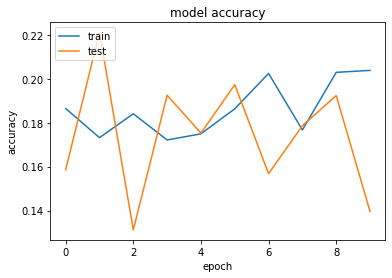

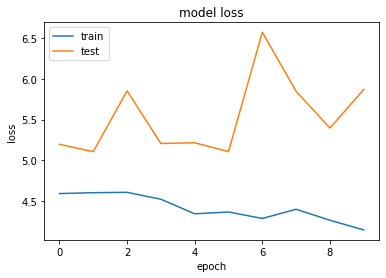

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Return word from the tokenizer dictionary
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

def wordID(ID):
  for word, index in tokenizer.word_index.items():
    if ID == index:
      return word
  return None

def generate_description(imageID):
  in_text = 'beginsentence'
  for i in range(max_lengthed_description):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_lengthed_description)
    #print(sequence)
    predict_next_word = model.predict([features[imageID], sequence], verbose=False)
    predict_next_word = np.argmax(predict_next_word)
    #print(predict_next_word)
    word = wordID(predict_next_word)
    if word is None:
      print("Word: {}".format(word))
      break
    in_text = in_text + ' ' + word
    if word == 'endsentence':
      break
  return in_text

def evaluate_model(data):
  actual, predicted = list(), list()
  for i in range(len(data)):
    references = [d.split() for d in data[i][1]]
    prediction = generate_description(data[i][0])
    #print(data[i][0], data[i][1])
    #print(references, prediction)
    #break
    actual.append(references)
    predicted.append(prediction.split())
  print("BLEU Score for 1 gram model", corpus_bleu(actual, predicted, weights=(1.0,0,0,0)))
  print("BLEU Score for 2 gram model", corpus_bleu(actual, predicted, weights=(0.5,0.5,0,0)))
  print("BLEU Score for 3 gram model", corpus_bleu(actual, predicted, weights=(0.3,0.3,0.3,0)))
  print("BLEU Score for 4 gram model", corpus_bleu(actual, predicted, weights=(.25, .25, .25, .25)))
  return actual, predicted


actual, predicted = evaluate_model(train_test_list)
#print(wordID(19))
#print(tokenizer.word_index)

for j in range(5):
    print(actual[j], predicted[j])

BLEU Score for 1 gram model 0.32109718825237626
BLEU Score for 2 gram model 0.09641192849279855
BLEU Score for 3 gram model 0.044952756920478766
BLEU Score for 4 gram model 0.014059551803712452
[['beginsentence', 'a', 'dog', 'in', 'some', 'water', 'enclose', 'by', 'rocky', 'ledge', 'endsentence'], ['beginsentence', 'a', 'white', 'dog', 'be', 'stand', 'in', 'a', 'pond', 'endsentence'], ['beginsentence', 'a', 'white', 'dog', 'be', 'wade', 'in', 'a', 'pond', 'atop', 'a', 'mountain', 'endsentence']] ['beginsentence', 'be', 'dog', 'a', 'dog', 'a', 'dog', 'endsentence']
[['beginsentence', 'three', 'child', 'in', 'rural', 'area', 'play', 'in', 'muddy', 'water', 'endsentence'], ['beginsentence', 'three', 'boy', 'play', 'in', 'the', 'mud', 'endsentence'], ['beginsentence', 'three', 'naked', 'little', 'boy', 'be', 'play', 'in', 'a', 'river', 'and', 'be', 'cover', 'in', 'mud', 'one', 'be', 'stand', 'up', 'endsentence']] ['beginsentence', 'be', 'boy', 'a', 'dog', 'endsentence']
[['beginsentence', 



**Model Evaluation
1. Take a random image from google and generate caption for that image.

17235968/17225924 [==============================] - 0s 0us/step
(224, 224, 3)


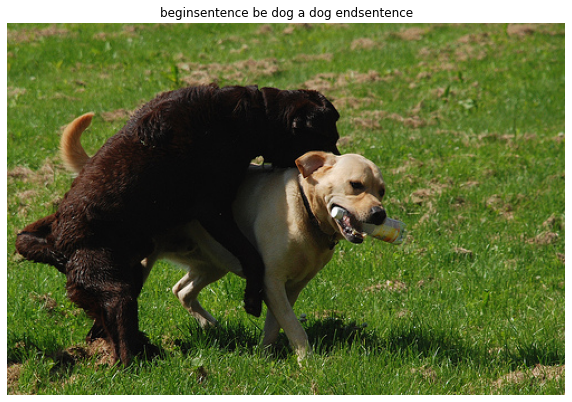

In [ ]:
#Model evaluation with random Image
#Let's Pick a random image from below 4 images.
#/content/drive/MyDrive/task/image01.jpg
#/content/drive/MyDrive/task/image02.jpg
#/content/drive/MyDrive/task/image03.jpg
#/content/drive/MyDrive/task/image04.jpg
#/content/drive/MyDrive/task/image05.jpg

test_image_path = '/content/drive/MyDrive/task/dogs.jpg'

mn_model =  MobileNet()
mn_model.layers.pop()
mn_model = Model(inputs=mn_model.inputs, outputs=mn_model.layers[-1].output)
test_image = load_img(test_image_path, target_size=(224,224))
test_image = img_to_array(test_image)
print(test_image.shape)

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
test_image_feature = mn_model.predict(test_image, verbose=0)

intext = 'beginsentence'
for i in range(max_lengthed_description):
  sequence = tokenizer.texts_to_sequences([intext])[0]
  sequence = pad_sequences([sequence], maxlen=max_lengthed_description)
  predict_next_word = model.predict([test_image_feature, sequence], verbose=False)
  predict_next_word = np.argmax(predict_next_word)
  word = wordID(predict_next_word)

  if word is None:
    break
  intext = intext + ' ' + word
  if word == 'endsentence':
    break

# print(intext)

#Display the image with caption
plt.figure(figsize=(10,10))
img = mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.title(intext)
plt.axis('off')
plt.show()

Conclusion:-
1. We have used standard learning rate to train model due to limited GPU resources.
2. Total time taken for training is 8.71MIN
3. Instead of using smaller mobilnet, we can have a look at larger CNN models for better image feature extrection.
4. By imporvng the vocabulary size, we can improve the sequence generation component.
5. By adding pre trained words can improve performance of model.
6. Experimenting with better hyperparameters of models can improve performance.